In [37]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
data = pd.read_csv('/Users/sergejvasiljev/Documents/DATASETS/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data[data['Species'].isin(['Iris-versicolor', 'Iris-virginica'])].iloc[:,1:6].reset_index(drop=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['Species'])
le.classes_

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X = data.iloc[:,0:4]
y = pd.Series(data = le.transform(data['Species']))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Градиентный спуск

In [7]:
iter_ = 20
lrate = 0.001

In [8]:
def sigmoid(X, theta):    
    z = np.dot(X, theta[1:]) + theta[0]
    return 1.0 / ( 1.0 + np.exp(-z))

In [9]:
def costF(y, hx):
    f = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    return f

In [10]:
def grad(X, y, theta, lrate, iter_):
    cost = []
    for i in range(num_iter):
        hx = sigmoid(X, theta)
        error = hx - y
        grad = X.T.dot(error)

        theta[0] = theta[0] - lrate * error.sum()
        theta[1:] = theta[1:] - lrate * grad
        
        cost.append(costF(y, hx))
    return cost 

In [11]:
m, n = X_train.shape

theta = np.zeros(1+n)

alpha = 0.001
num_iter = 10000

cost = grad(X_train, y_train, theta, lrate, iter_)

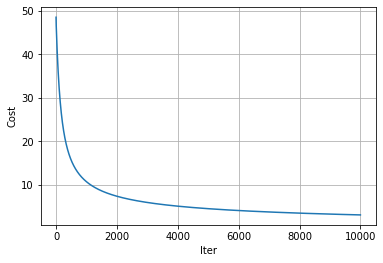

In [12]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.grid()

In [13]:
print ('Полученные параметры', theta)

Полученные параметры [-4.20414871 -3.44390305 -6.1491398   6.69156186  6.48123772]


In [14]:
cost[-1]

3.048822696204933

## Градиентный спуск Нестерова

In [51]:
m, n = X_train.shape
theta = np.zeros(1+n)

In [52]:
print(m,n)

70 4


In [53]:
def learn_nesterov(coefs, x, y, num_epochs=20, momentum=0.9, learning_rate=0.01):
    v_t = [0 for _ in range(len(coefs))]
    cost = []
    for it in range(num_epochs):
        pr_coefs  = [coefs[i] - momentum*v_t[i] for i in range(len(coefs))]
        gr_coefs = grad(x, y, pr_coefs, learning_rate, num_epochs)
        for i in range(len(coefs)):
            v_t[i] = momentum*v_t[i] + learning_rate*gr_coefs[i]
            coefs[i] = coefs[i]-v_t[i]
        hx = sigmoid(x, theta)
        cost.append(costF(y, hx))
    return cost, coefs

In [54]:
learn_nesterov(theta, X_train, y_train)

<ipython-input-9-c8cba7a91240>:2: RuntimeWarning: divide by zero encountered in log
  f = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
<ipython-input-8-63eed407582a>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / ( 1.0 + np.exp(-z))


([2172.495798248249,
  16077.575198508073,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 array([nan, nan, nan, nan, nan]))

## RMSprop

In [42]:
num_epochs = 20
momentum = 0.9
learning_rate = 0.001
theta = np.zeros(1+n)

In [43]:
def learn_RMSprop(theta, x, y):
    e = 10**(-8)
    S = [0 for _ in range(len(theta))]
    cost =[]
    for it in range(num_epochs):
        gr_coefs = grad(x, y, theta, learning_rate, num_epochs)
        gr_coefs_2 = [x**2 for x in gr_coefs]
        for i in range(len(theta)):
            S[i]=momentum*S[i] + (1-momentum)*gr_coefs_2[i]
            theta[i] = theta[i]-learning_rate* (gr_coefs[i]/(math.sqrt(S[i])+e))  
        hx = sigmoid(x, theta)
        cost.append(costF(y, hx))
    return cost, theta

In [44]:
learn_RMSprop(theta, X_train, y_train)

([], array([-14.83369775,  -5.96030566, -14.54253568,  14.1828693 ,
         14.74861004]))